In [ ]:
## import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
dataset=pd.read_csv('BankCreditCard.csv')
dataset.shape

(30000, 25)

In [3]:
dataset.dtypes


Customer ID                 int64
Credit_Amount             float64
Gender                      int64
Academic_Qualification      int64
Marital                     int64
Age_Years                   int64
Repayment_Status_Jan        int64
Repayment_Status_Feb        int64
Repayment_Status_March      int64
Repayment_Status_April      int64
Repayment_Status_May        int64
Repayment_Status_June       int64
Jan_Bill_Amount           float64
Feb_Bill_Amount           float64
March_Bill_Amount         float64
April_Bill_Amount         float64
May_Bill_Amount           float64
June_Bill_Amount          float64
Previous_Payment_Jan      float64
Previous_Payment_Feb      float64
Previous_Payment_March    float64
Previous_Payment_April    float64
Previous_Payment_May      float64
Previous_Payment_June     float64
Default_Payment             int64
dtype: object

In [4]:
dataset.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


In [5]:
## missing value
dataset.isnull().sum()

Customer ID               0
Credit_Amount             0
Gender                    0
Academic_Qualification    0
Marital                   0
Age_Years                 0
Repayment_Status_Jan      0
Repayment_Status_Feb      0
Repayment_Status_March    0
Repayment_Status_April    0
Repayment_Status_May      0
Repayment_Status_June     0
Jan_Bill_Amount           0
Feb_Bill_Amount           0
March_Bill_Amount         0
April_Bill_Amount         0
May_Bill_Amount           0
June_Bill_Amount          0
Previous_Payment_Jan      0
Previous_Payment_Feb      0
Previous_Payment_March    0
Previous_Payment_April    0
Previous_Payment_May      0
Previous_Payment_June     0
Default_Payment           0
dtype: int64

In [6]:
discrete_feature=[feature for feature in dataset.columns if len(dataset[feature].unique())<25]
print("Discrete Variables Count: {}".format(len(discrete_feature)))

Discrete Variables Count: 10


In [9]:
continuous_feature=[feature for feature in dataset.columns if feature not in discrete_feature+['Customer ID']]
print("Continuous feature Count {}".format(len(continuous_feature)))
continuous_feature

Continuous feature Count 14


['Credit_Amount',
 'Age_Years',
 'Jan_Bill_Amount',
 'Feb_Bill_Amount',
 'March_Bill_Amount',
 'April_Bill_Amount',
 'May_Bill_Amount',
 'June_Bill_Amount',
 'Previous_Payment_Jan',
 'Previous_Payment_Feb',
 'Previous_Payment_March',
 'Previous_Payment_April',
 'Previous_Payment_May',
 'Previous_Payment_June']

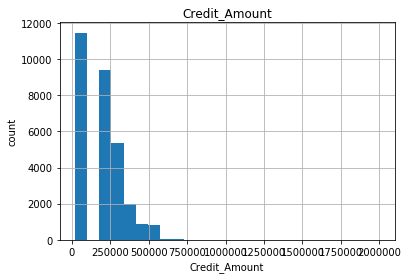

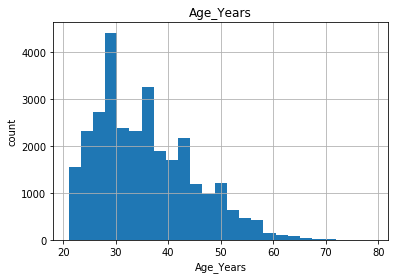

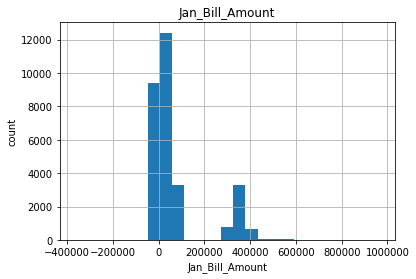

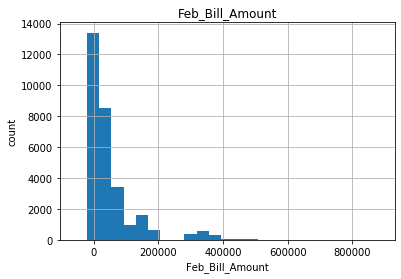

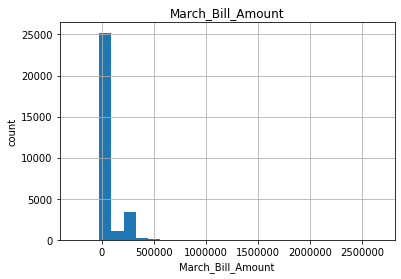

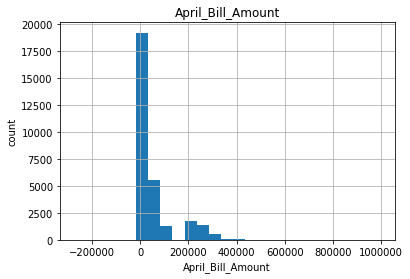

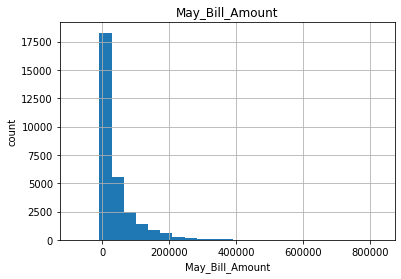

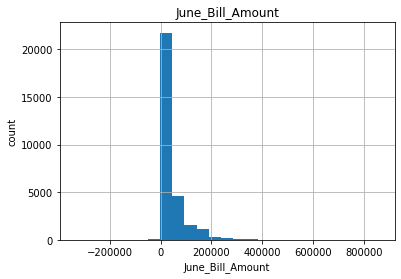

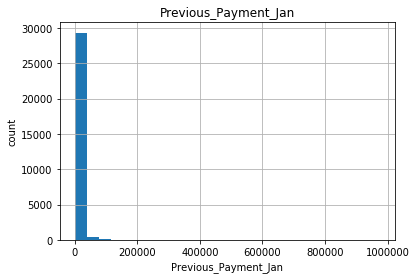

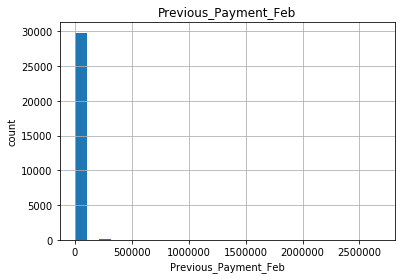

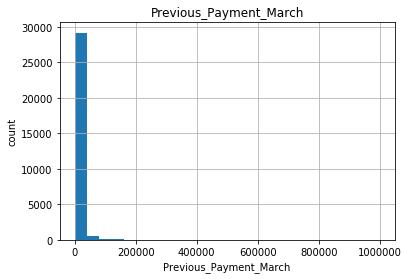

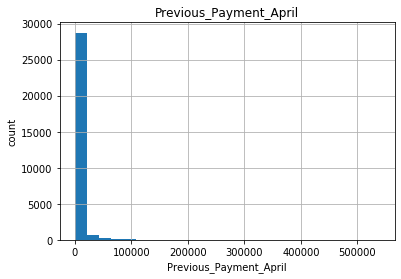

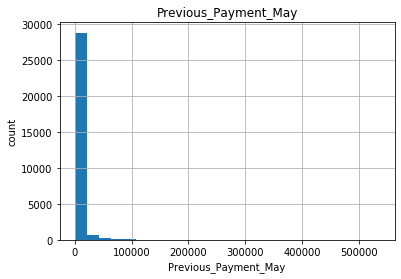

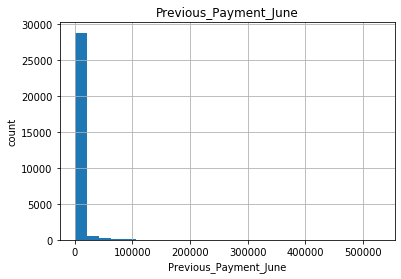

In [11]:
for x in continuous_feature:
    dataset[x].hist(bins=25)
    plt.xlabel(x)
    plt.ylabel('count')
    plt.title(x)
    plt.show()
    

In [46]:
dataset['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

In [ ]:
23364/()

In [12]:
#random_state is the seed used by the random number generator, it can be any integer.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,dataset['Default_Payment'], train_size=0.7 ,test_size = 0.3, random_state=100)

In [14]:
X_train.shape,X_test.shape,y_test.shape,y_train.shape

((21000, 25), (9000, 25), (9000,), (21000,))

In [15]:
x=X_train.drop(['Customer ID','Default_Payment'],axis=1)

In [16]:
y=X_train['Default_Payment']

In [39]:
x_test=X_test.drop(['Customer ID','Default_Payment'],axis=1)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [18]:
params={'class_weight':['balanced',None],
        'penalty':['l1','l2'],
        'C':np.linspace(0.01,1000,10)}

In [21]:
model=LogisticRegression(fit_intercept=True)

In [22]:
grid_search=GridSearchCV(model,param_grid=params,cv=5,scoring="roc_auc")

In [23]:
grid_search.fit(x,y)

C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': array([1.0000e-02, 1.1112e+02, 2.2223e+02, 3.3334e+02, 4.4445e+02,
       5.5556e+02, 6.6667e+02, 7.7778e+02, 8.8889e+02, 1.0000e+03]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [24]:
grid_search.best_estimator_

LogisticRegression(C=1000.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [26]:
report(grid_search.cv_results_,5)


Model with rank: 1
Mean validation score: 0.757 (std: 0.011)
Parameters: {'C': 1000.0, 'class_weight': 'balanced', 'penalty': 'l1'}

Model with rank: 2
Mean validation score: 0.757 (std: 0.011)
Parameters: {'C': 888.89, 'class_weight': 'balanced', 'penalty': 'l1'}

Model with rank: 3
Mean validation score: 0.757 (std: 0.011)
Parameters: {'C': 333.34, 'class_weight': 'balanced', 'penalty': 'l1'}

Model with rank: 4
Mean validation score: 0.757 (std: 0.011)
Parameters: {'C': 111.12, 'class_weight': 'balanced', 'penalty': 'l1'}

Model with rank: 5
Mean validation score: 0.757 (std: 0.011)
Parameters: {'C': 555.56, 'class_weight': 'balanced', 'penalty': 'l1'}



In [27]:
logr=grid_search.best_estimator_

In [28]:
logr.fit(x,y)

C:\Users\skyas\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1000.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:
print(logr.predict_proba(x)) # Probability of both Classes , for each observations
logr.classes_

[[0.61656685 0.38343315]
 [0.57231411 0.42768589]
 [0.03546407 0.96453593]
 ...
 [0.67961403 0.32038597]
 [0.58815493 0.41184507]
 [0.68264799 0.31735201]]


array([0, 1], dtype=int64)

In [30]:
train_score=logr.predict_proba(x)[:,1]
real=y

In [36]:
train_score>0.2

array([ True,  True,  True, ...,  True,  True,  True])

In [31]:
cutoffs=np.linspace(0.01,0.99,99)

cutoffs

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])

In [32]:
KS_all=[]

for cutoff in cutoffs:
    
    predicted=(train_score>cutoff).astype(int)

    TP=((predicted==1) & (real==1)).sum()
    TN=((predicted==0) & (real==0)).sum()
    FP=((predicted==1) & (real==0)).sum()
    FN=((predicted==0) & (real==1)).sum()
    
    P=TP+FN
    N=TN+FP
      
    KS=(TP/P)-(FP/N)
    
    
    KS_all.append(KS)


In [33]:
# print(cutoffs[KS_all==max(KS_all)].shape)
# type(cutoffs[KS_all==max(KS_all)][0])
mycutoff=cutoffs[KS_all==max(KS_all)][0]
mycutoff

0.47000000000000003

In [34]:
logr.intercept_

array([0.04060978])

In [35]:
logr.coef_[0]

array([-1.53535870e-06, -8.96255091e-02, -5.29830016e-02, -1.45410568e-01,
        4.97994136e-03,  9.08924096e-01,  7.13350432e-02,  1.49251860e-01,
        1.16072396e-01,  1.02547062e-01,  1.48296203e-01, -8.11040333e-07,
        1.81921132e-06,  9.06557318e-07, -9.41036744e-07, -6.56694996e-07,
        2.23417673e-07, -8.21937384e-06, -5.25571528e-06,  7.20230920e-08,
       -1.64745821e-06, -4.27547206e-06, -9.09588662e-07])

In [36]:
x.columns.shape

(23,)

In [37]:
list(zip(x.columns,logr.coef_[0]))

[('Credit_Amount', -1.535358702207169e-06),
 ('Gender', -0.08962550910598979),
 ('Academic_Qualification', -0.05298300163940461),
 ('Marital', -0.14541056751355153),
 ('Age_Years', 0.0049799413647459885),
 ('Repayment_Status_Jan', 0.9089240962597974),
 ('Repayment_Status_Feb', 0.0713350431992207),
 ('Repayment_Status_March', 0.14925185999327056),
 ('Repayment_Status_April', 0.11607239600105067),
 ('Repayment_Status_May', 0.102547061593866),
 ('Repayment_Status_June', 0.14829620259521323),
 ('Jan_Bill_Amount', -8.110403334861351e-07),
 ('Feb_Bill_Amount', 1.8192113214614248e-06),
 ('March_Bill_Amount', 9.065573176621687e-07),
 ('April_Bill_Amount', -9.410367439094134e-07),
 ('May_Bill_Amount', -6.566949959873312e-07),
 ('June_Bill_Amount', 2.234176727556831e-07),
 ('Previous_Payment_Jan', -8.219373840840341e-06),
 ('Previous_Payment_Feb', -5.255715278384512e-06),
 ('Previous_Payment_March', 7.202309201333175e-08),
 ('Previous_Payment_April', -1.6474582054588282e-06),
 ('Previous_Payment

#### if i simply had to submit probability scores , i could do this 

In [40]:
test_score=logr.predict_proba(x_test)[:,1]
pd.DataFrame(test_score).to_csv("mysubmissionlogistic.csv",index=False)

In [41]:
test_score

array([0.41559364, 0.48477819, 0.36702404, ..., 0.36373348, 0.90157287,
       0.43131002])

#### if i had to submit hardclasses , i can apply the cutoff obtained above and then submit

In [42]:
test_classes=(test_score>mycutoff).astype(int)

In [44]:
 roc_auc_score(y_test,logr.predict(x_test))

0.7030714352717413